<a href="https://colab.research.google.com/github/cherryng/MLcourse/blob/main/H5_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Python packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import pickle
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams.update({'font.size': 13,'font.family': 'serif'})


In [3]:
#data set can be downloaded from Kaggle https://www.kaggle.com/competitions/instacart-market-basket-analysis/data
#Since they are too big to upload to github, I am uploading them from my laptop
#here I will read in the csv files and first visualize the data to better understand the data set.

data_aisles = pd.read_csv("aisles.csv")
print(f"Number of records: {len(data_aisles)}")
data_aisles.head()

Number of records: 134


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
data_prod = pd.read_csv("products.csv")
print(f"Number of records: {len(data_prod)}")
data_prod.head()

Number of records: 49688


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
data_dept = pd.read_csv("departments.csv")
print(f"Number of records: {len(data_dept)}")
data_dept.head()

Number of records: 21


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
data_samp = pd.read_csv("sample_submission.csv")
print(f"Number of records: {len(data_samp)}")
data_samp.head()

Number of records: 75000


,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [7]:
data_orders = pd.read_csv("orders.csv")
print(f"Number of records: {len(data_orders)}")
print(data_orders.head())

#Find out number of users:
user_id = data_orders["user_id"]
total_user = user_id.max()
print("number of users:", total_user)

Number of records: 3099962
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                8.0   
1   2398795        1    prior             2          3                7.0   
2    473747        1    prior             3          3               12.0   
3   2254736        1    prior             4          4                7.0   
4    431534        1    prior             5          4               15.0   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
number of users: 186935


Mode: ModeResult(mode=array([4]), count=array([21769])) Mean: 16.583101077914783


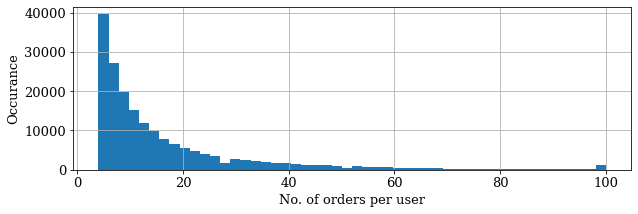

In [21]:
#Check how many times each user have ordered

#This method is too slow, takes about 18min to run
"""
order_no = np.zeros(total_user,dtype=int)
for i in range(1,total_user+1):
    subset = np.where(data_orders["user_id"] == i)
    order_no[i-1] = len(subset[0]) 
    #print(i, subset, order_no[i] )
"""

users_order = data_orders.groupby('user_id')['order_number'].aggregate('max').reset_index()
fig = plt.figure(1, figsize=(10,3))
plt.hist(users_order["order_number"], density=False, bins=50)  # density=False would make counts
plt.ylabel('Occurance')
plt.xlabel('No. of orders per user')
plt.grid()
print("Mode:", stats.mode(users_order["order_number"]), "Mean:",np.mean(users_order["order_number"]))


count_week [544318. 532150. 423255. 396289. 386104. 411115.]


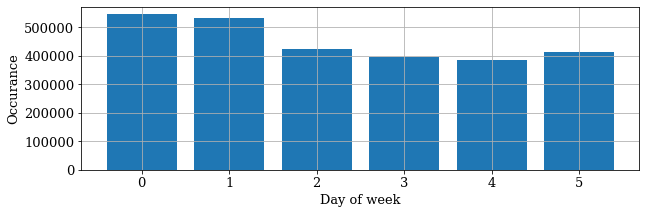

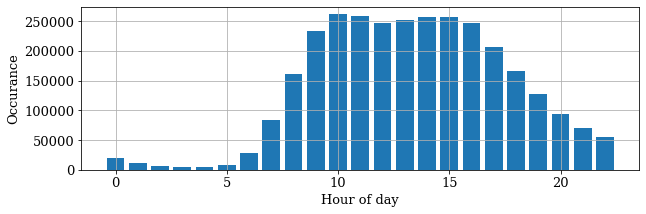

In [18]:
#Histogram of dow
fig = plt.figure(1, figsize=(10,3))
bins = np.arange(7)-0.5
arr = plt.hist(data_orders["order_dow"], density=False, bins=bins, rwidth=0.8)  # density=False would make counts
count_week = arr[0]
print("count_week",count_week)
plt.ylabel('Occurance')
plt.xlabel('Day of week')
plt.grid()

#histogram of hod
fig = plt.figure(2, figsize=(10,3))
bins = np.arange(24)-0.5
arr = plt.hist(data_orders["order_hour_of_day"], density=False, bins=bins, rwidth=0.8)  # density=False would make counts
count_hour = arr[0]
plt.ylabel('Occurance')
plt.xlabel('Hour of day')
plt.grid()

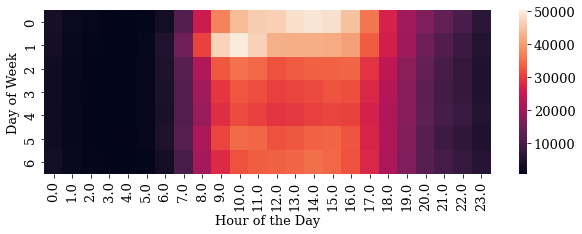

In [19]:
#Heatmap
fig = plt.figure(3, figsize=(10,3))
group_hour_dow = data_orders.groupby(['order_dow', 'order_hour_of_day'])['order_number'].aggregate('count').reset_index()
group_hour_dow = group_hour_dow.pivot('order_dow', 'order_hour_of_day', 'order_number')
sns.heatmap(group_hour_dow)

plt.ylabel('Day of Week')
plt.xlabel('Hour of the Day')
plt.show()

In [22]:
data_order_prior = pd.read_csv("order_products__prior.csv")
print(f"Number of records: {len(data_order_prior)}")
data_order_prior.head()

print(np.unique(data_order_prior["order_id"]))

Number of records: 32434489
[      2       3       4 ... 3421081 3421082 3421083]


In [23]:
data_order_train = pd.read_csv("order_products__train.csv")
print(f"Number of records: {len(data_order_train)}")
data_order_train.head()

print(np.unique(data_order_train["order_id"]))

Number of records: 1384617
[      1      36      38 ... 3421058 3421063 3421070]


In [ ]:
#Pre-process the data
#Data array with user - order_id - product_id